<a href="https://colab.research.google.com/github/siddub123/ML_Projects/blob/main/Air_Quality_index_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [4]:
df =pd.read_csv('/content/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [5]:
df.shape

(29531, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

# Data Cleaning


In [8]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [10]:
df['PM2.5'].mean()

67.45057794890306

In [11]:
df['PM2.5'].fillna(67,inplace= True)

In [12]:
df['PM10'].mean()

118.12710293078135

In [13]:
df['PM10'].fillna(118,inplace= True)

In [14]:
df['NO'].mean()

17.574729662029362

In [15]:
df['NO'].fillna(17,inplace= True)

In [17]:
df['NO2'].mean()

28.560659061126955

In [38]:
df['NO2'].fillna(28,inplace= True)

In [26]:
df['SO2'].mean()

14.53197725590996

In [27]:
df['SO2'].fillna(14,inplace =True)

In [28]:
df['O3'].mean()

34.49143047551845

In [29]:
df['O3'].fillna(34,inplace =True)

In [36]:
df['CO'].mean()


2.231265111239037

In [37]:
df['CO'].fillna(2,inplace=True)


In [45]:
df['AQI'].mean()

166.4635814889336

In [47]:
df['AQI'].fillna(166, inplace= True)

In [48]:
new_data = df.drop(['City','Date','NOx','NH3','Benzene','Toluene','Xylene','AQI_Bucket'], axis =1)

In [49]:
new_data.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [50]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   29531 non-null  float64
 1   PM10    29531 non-null  float64
 2   NO      29531 non-null  float64
 3   NO2     29531 non-null  float64
 4   CO      29531 non-null  float64
 5   SO2     29531 non-null  float64
 6   O3      29531 non-null  float64
 7   AQI     29531 non-null  float64
dtypes: float64(8)
memory usage: 1.8 MB


In [51]:
# convert data into in datatype to avoid errors below
Prepared_data = new_data.astype(int)
Prepared_data.head()


,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166


In [52]:
Prepared_data.tail()


,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
29526,15,50,7,25,0,8,23,41
29527,24,74,3,26,0,12,30,70
29528,22,65,3,29,0,8,30,68
29529,16,49,4,29,0,9,28,54
29530,15,66,0,26,0,2,17,50


In [53]:
Prepared_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   29531 non-null  int64
 1   PM10    29531 non-null  int64
 2   NO      29531 non-null  int64
 3   NO2     29531 non-null  int64
 4   CO      29531 non-null  int64
 5   SO2     29531 non-null  int64
 6   O3      29531 non-null  int64
 7   AQI     29531 non-null  int64
dtypes: int64(8)
memory usage: 1.8 MB


In [56]:
Prepared_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,66.961667,59.415477,0.0,32.0,58.0,72.0,949.0
PM10,29531.0,117.771460,71.502782,0.0,79.0,118.0,118.0,1000.0
NO,29531.0,17.061698,21.365891,0.0,6.0,11.0,17.0,390.0
NO2,29531.0,28.059226,22.944183,0.0,12.0,25.0,34.0,362.0
CO,29531.0,1.805052,6.710749,0.0,0.0,0.0,1.0,175.0
SO2,29531.0,14.029765,16.910682,0.0,6.0,10.0,14.0,193.0
O3,29531.0,33.995259,20.161619,0.0,20.0,34.0,42.0,257.0
AQI,29531.0,166.390099,129.064459,13.0,88.0,138.0,179.0,2049.0


#  Data Visulization

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

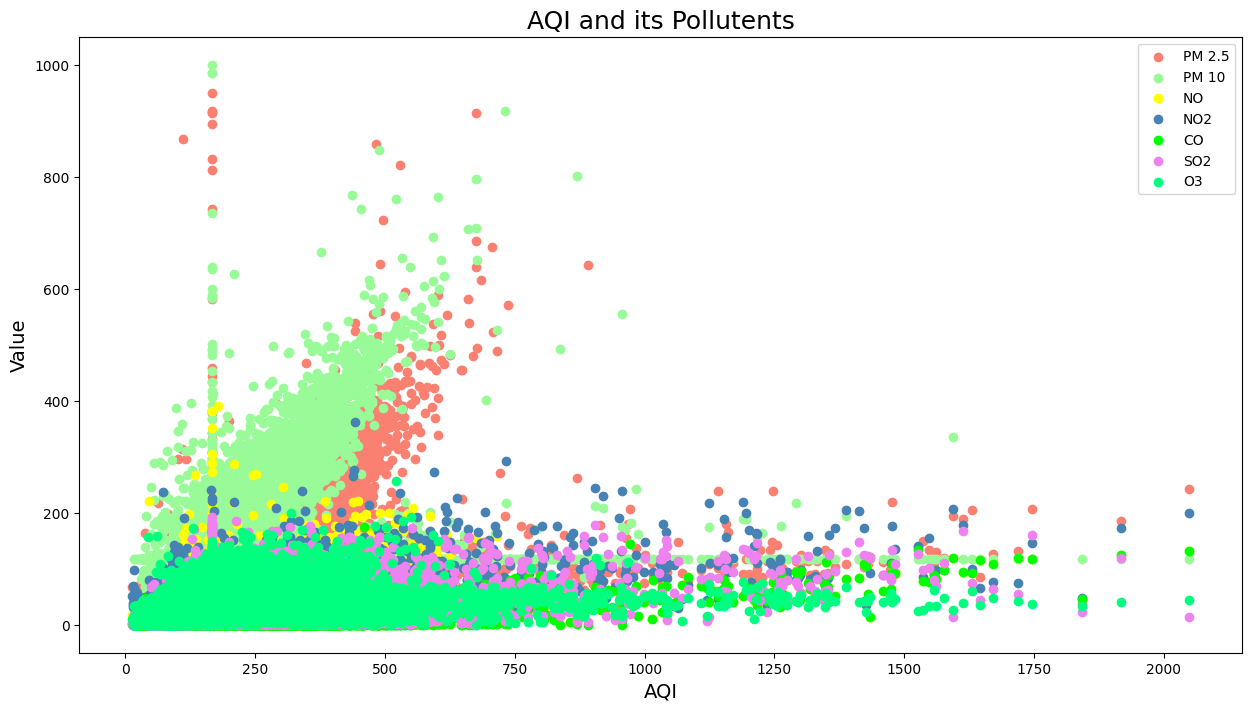

In [61]:

x=Prepared_data['AQI']
y1=Prepared_data['PM2.5']
y2=Prepared_data['PM10']
y3=Prepared_data['NO']
y4=Prepared_data['NO2']
y5=Prepared_data['CO']
y6=Prepared_data['SO2']
y7=Prepared_data['O3']
plt.figure(figsize=(15,8))
plt.scatter(x,y1,label='PM 2.5',color='salmon')
plt.scatter(x,y2,label='PM 10',color='palegreen')
plt.scatter(x,y3,label='NO',color='yellow')
plt.scatter(x,y4,label='NO2',color='steelblue')
plt.scatter(x,y5,label='CO',color='lime')
plt.scatter(x,y6,label='SO2',color='violet')
plt.scatter(x,y7,label='O3',color='springgreen')
plt.title('AQI and its Pollutents',fontsize=18)
plt.xlabel('AQI',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.legend()
plt.show()


<Axes: >

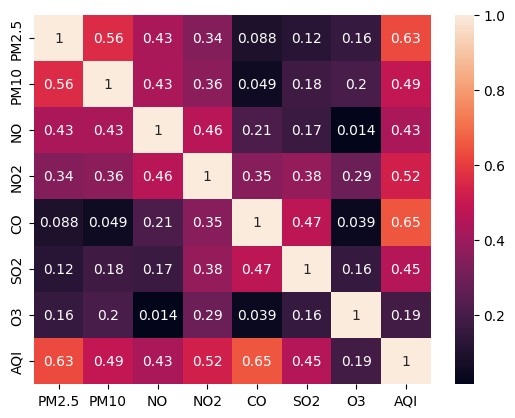

In [63]:
#to find correlation between different columns.
corr = Prepared_data.corr()
sns.heatmap(corr, annot=True)

# Data Training

In [65]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features and y will have our target i.e. Air Quality Index(AQI)
x=Prepared_data[['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2','O3']]
y=Prepared_data['AQI']

In [66]:
x.shape

(29531, 7)

In [67]:
y.shape

(29531,)

In [68]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#Ratio used for splitting training and testing data is 8:2 respectively

#Model Creation

In [69]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [70]:
# Fitting data into the model.
reg1.fit(x_train, y_train)

LinearRegression()

In [116]:
pred_1 = reg1.predict(x_test)

In [117]:
predict_1

array([148.31596408, 114.47643078, 770.39007556, ..., 220.84299776,
       161.43922599, 400.98300101])

In [118]:
(reg1.score(x_train,y_train))

0.7942975650383609

In [119]:
print('Accuracy of the LinearRegression model comes to be:\n',reg1.score(x_train,y_train)*100)

Accuracy of the LinearRegression model comes to be:
 79.42975650383609



#Lasso Regression


In [88]:
from sklearn.linear_model  import Lasso
reg2 = Lasso()

In [90]:
reg2.fit(x_train, y_train)

Lasso()

In [91]:
pred_2= reg2.predict(x_test)

In [93]:
pred_2

array([148.41016056, 114.44423387, 769.82414111, ..., 220.92683119,
       161.50332447, 400.76335272])

In [95]:
(reg2.score(x_train,y_train))
print("Accuracy of the LassoRegression model comes to be: \n ",reg2.score(x_train,y_train))



Accuracy of the LassoRegression model comes to be: 
  79.42959978650029


# Ridge Regression


In [96]:
from sklearn.linear_model import Ridge
reg3 = Ridge()

In [99]:
reg3.fit(x_train, y_train)

Ridge()

In [101]:
pred_3= reg3.predict(x_test)
pred_3

array([148.31594805, 114.47640074, 770.38998523, ..., 220.84300891,
       161.43924562, 400.98288656])

In [102]:
(reg3.score(x_train,y_train))
print("Accuracy of the idgeRegression model comes to be: \n ",reg3.score(x_train,y_train)*100)

Accuracy of the LassoRegression model comes to be: 
  79.42975650380333


# Decission Tree Regressor

In [110]:
from sklearn.tree import DecisionTreeRegressor
reg4 = DecisionTreeRegressor()

reg4.fit(x_train, y_train)
pred_4= reg4.predict(x_test)
pred_4


array([ 576.,   74., 1217., ...,  302.,  155.,  358.])

In [112]:
(reg4.score(x_train,y_train))
print("Accuracy of the Decision tree regresso model  comes to be: \n ",reg4.score(x_train,y_train)*100)

Accuracy of the Decision tree regresso model  comes to be: 
  99.90541861281396


# performance Evaluation

In [120]:

from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model")
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred_1)), reg1.score(x_train,y_train)))
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred_2)), reg1.score(x_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred_3)), reg3.score(x_train,y_train)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred_4)), reg4.score(x_train,y_train)))



Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 61.1042 	 		 0.7943
Linear Regression 		 61.1218 	 		 0.7943
Ridge Regression 		 61.1042 	 		 0.7943
Decision Tree Regressor		 67.6732 	 		 0.9991


# Conclusion
Conclusion: Accuracy of Regression models- Linear regression, lasso regression and rigde regression is almost same.

Whereas accuracy of decision tree regressor is higher

Decision tree regressor is more efficient model.